In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Perform database schema inspection.

inspector = inspect(engine)

In [11]:
# Measurement table columns information
measurment_columns = inspector.get_columns('Measurement')
for column in measurment_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#Station table columns information
station_columns = inspector.get_columns('Station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [15]:
#retrieve precipitation data for the last 12 months
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Calculate the date 1 year ago from the last data point in the database
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)
prcp_df = prcp_df.dropna()
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


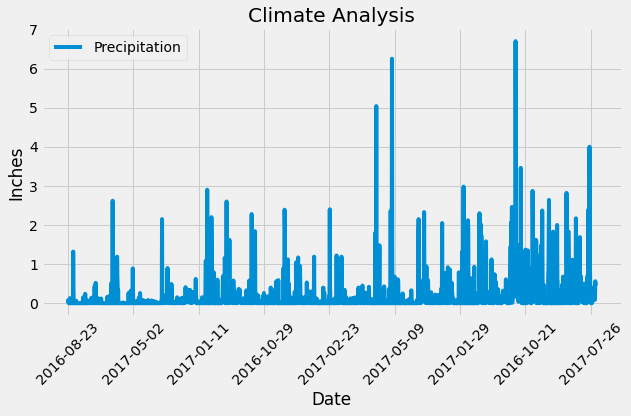

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
plot = prcp_df.plot(rot=45, title = "Climate Analysis", xlabel='Date', ylabel = "Inches", figsize=(9,6))
plt.tight_layout()
plt.show()
plot.figure.savefig('Annual_Precipitation_Hawaii.png', bbox_inches='tight')

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Station.id).count()
station_number

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Station.station, func.count(Measurement.id)).\
                filter(Station.station == Measurement.station).group_by(Station.station).\
                order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), 
                                    func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print(f" Low  : {active_station[0][0]}")
print(f" High : {active_station[0][1]}")
print(f" Avg  : {active_station[0][2]}")

 Low  : 54.0
 High : 85.0
 Avg  : 71.66378066378067


In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


Active_station_query = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
                filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").all()
#Active_station_query 

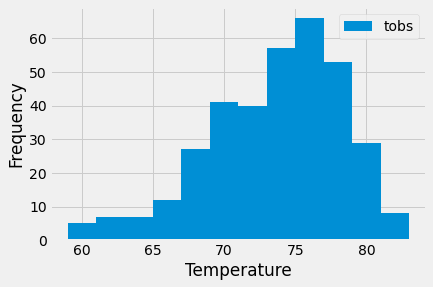

In [34]:
# plot the results as a histogram

tot_obs_df = pd.DataFrame(Active_station_query, columns=["tobs"])


#Plot the results as a histogram with bins=12
plt.hist(tot_obs_df['tobs'],12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Temp_for_most_active station_last_12months.png")
plt.show()